========问题求解================================
利润最大订货量q= 106.7
最大日均利润为： 2872.889152922318
成本最低订货量q= 106.7
最低日均成本为： 127.11084696831874


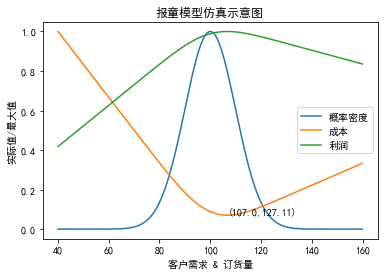

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 19 05:11:12 2020

@author: Administrator
"""

import numpy as np
import matplotlib.pyplot as plt

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

# 正态分布函数，输出概率密度
def normal(x, mean, sigma):
    return 1 / sigma * np.sqrt(2 * np.pi) * np.exp(
        -(x - mean) ** 2 / 2 / sigma **2)

# 成本函数（两种情况）
def tCost(order, demand, outOfStockCost, overStockCost):
    if order <= demand:
        return outOfStockCost * (demand - order)
    else:
        return overStockCost * (order - demand)

# 利润函数（两种情况）
def tProfit(order, demand, price, cost, buybackPrice = 0):
    if order <= demand:
        return price * order - cost * order
    else:
        return (price - cost) * demand - (
            cost - buybackPrice) * (order - demand)


def newsBoy():
   
    # 报纸需求参数值：均值、标准差、步进间隔
    meanDemand = 100
    devDemand = 10
    step = 0.1
    
    
    # 价格参数：单价、采购成本、回购价格（收入）、缺货成本、积压成本
    price = 50
    cost = 20
    buybackPrice = 10
    outOfStockCost = price - cost
    overStockCost = cost -buybackPrice
    
    # 随机数生成：需求随机，正态分布
    #demandArray = np.arange(meanDemand - 1 * meanDemand, 
    #                        meanDemand + 1 * meanDemand, step)
    
    demandArray = np.arange(meanDemand - 6 * devDemand, 
                            meanDemand + 6 * devDemand, step) 
    
    orderArray = demandArray

    # 概率数组
    probArray = normal(demandArray, meanDemand, devDemand)
    

    # 成本集合
    costline = [sum(np.array(
        [tCost(q, d, outOfStockCost, overStockCost) for d in demandArray
         ]) * probArray) for q in orderArray]


    profitline = [sum(np.array(
        [tProfit(q, d, price, cost, buybackPrice) for d in demandArray
         ]) * probArray) for q in orderArray]

    # 图表基本参数
    plt.title('报童模型仿真示意图')
    plt.xlabel('客户需求 & 订货量')
    plt.ylabel('实际值/最大值')

    # 显示随机需求概率分布、报童成本与利润
    plt.plot(demandArray, probArray / max(probArray), label='概率密度')
    plt.plot(orderArray, costline / max(costline), label='成本')
    plt.plot(orderArray, profitline / max(profitline), label='利润')
      
    # 最优值计算与输出
    max_indx = np.argmax(profitline)
    min_indx = np.argmin(costline)
    baseline = meanDemand - 6 * devDemand
    
    print('========问题求解================================')
    print('利润最大订货量q=', baseline + max_indx * step)
    # sum(probArray) 不是积分
    print('最大日均利润为：', profitline[max_indx] / sum(probArray))
    print('成本最低订货量q=', baseline + min_indx * step)
    print('最低日均成本为：', costline[min_indx] / sum(probArray))
    
    # 显示最值点
    show_min = '({x},{y})'.format(
        x=round(baseline + min_indx * step, 0), 
        y=round(costline[min_indx] / sum(probArray), 2))
    plt.annotate(show_min, xy=(baseline + min_indx * step,
        costline[max_indx] / max(costline)))
    
    plt.legend()
    plt.show()
   

if __name__ == '__main__':
    newsBoy()


## 思考：
1. 如何代码实现正态分布的随机需求？
2. 还有其他的代码实现方法么？
3. 这个仿真与圆周率仿真运算，有何联系？